# Table of Contents

1. Importing Libraries and Data
2. Task 6.6

# 1. Importing Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\cmkep\Cathy\World Happiness'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Python Exported Data', 'CF_2015_2019_2.csv'), index_col = False)

In [87]:
# Configure API key 

quandl.ApiConfig.api_key = 'zZWuQDGsJNJwkJ8CUMwv'

In [88]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('FRED/GDPPOT')

In [89]:
data.head(5)

Value
Date                   
1949-01-01  2102.982630
1949-04-01  2130.581305
1949-07-01  2159.340530
1949-10-01  2186.844859
1950-01-01  2216.058359

In [90]:
data.shape

(332, 1)

In [91]:
data.columns

Index(['Value'], dtype='object')

In [92]:
type(data)

pandas.core.frame.DataFrame

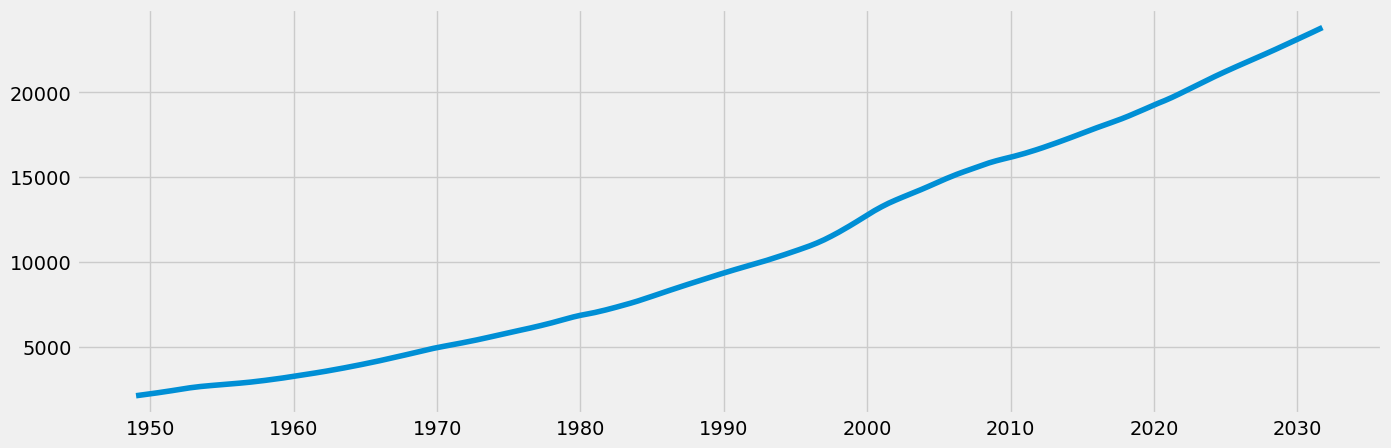

In [93]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

# 2. Task 6.6

### Make a subset of your data set if necessary.

In [62]:
#create subset  --- went back to grab a Quandl data set instead---

df_sub = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'Happiness_Rank', 'GDP_Capita', 'Family', 'Life_Expectancy', 'Freedom', 'Generosity', 'Govt_Corruption', 'Dystopia_Residual', 'Average_GDP_Capita'])

In [63]:
df_sub.head()

Year      Country  Happiness_Score
0  2015  Switzerland            7.587
1  2015      Iceland            7.561
2  2015      Denmark            7.527
3  2015       Norway            7.522
4  2015       Canada            7.427

In [64]:
#create subset for one "Top Ten" country

df_sub_2 =  df_sub[df_sub['Country']=='Switzerland']

In [78]:
df_sub_2.head()

Year      Country  Happiness_Score
0    2015  Switzerland            7.587
159  2016  Switzerland            7.509
318  2017  Switzerland            7.494
474  2018  Switzerland            7.487
631  2019  Switzerland            7.480

### In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.

##### While this data set has a time component (years) they are tracking statistics for over 100 countries each per year. It was necessary to single out an individual country to analyze. I chose Switerland, a regular Top Ten country for world happiness, to see how its Happiness Scores have changed from 2015-2019.

##### I ended up needing to go start over and grab a data set from Quandl instead. I chose the Real Potential GDP for the US.  As the estimated contribution of GDP_Capita to a country's happiness has one of the stronger correlations to its Happiness Score, I thought it would be intersting to see the US's GDP over time (generally one of the world's strongest) and perhaps compare it to its estimated contribution to the US' Happiness Score over the years. I decided to look at data from 1980 to 2019 to both encompass the Happiness data from 2015-2019 and to get a since for how reliable the US' GDP is. 

### Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

In [79]:
# This was when I tried working with my original data set. 

df_sub_2.set_index('Year')

Country  Happiness_Score
Year                              
2015  Switzerland            7.587
2016  Switzerland            7.509
2017  Switzerland            7.494
2018  Switzerland            7.487
2019  Switzerland            7.480

In [80]:
#remove "Country" column to leave time and variable columns

df_sub_3 = df_sub_2.drop(columns = ['Country'])

In [83]:
# While this appears to be indexed correctly, it would not allow me to make a line graph with it.

df_sub_3.set_index('Year')

Happiness_Score
Year                 
2015            7.587
2016            7.509
2017            7.494
2018            7.487
2019            7.480

In [84]:
# Set the "Year" column as the index -- I had issues getting just the year to show as the index and with so few points decided to grab a time series data set from Quandl instead.

from datetime import datetime

df_sub_3['datetime'] = pd.to_datetime(df_sub_3['Year']) # Create a datetime column from "Year.""
df_sub_3 = df_sub_3.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sub_3.drop(['Year'], axis=1, inplace=True) # Drop the "Year" column.
df_sub_3.head()

Happiness_Score
datetime                                      
1970-01-01 00:00:00.000002015            7.587
1970-01-01 00:00:00.000002016            7.509
1970-01-01 00:00:00.000002017            7.494
1970-01-01 00:00:00.000002018            7.487
1970-01-01 00:00:00.000002019            7.480

In [94]:
# This is where I switched to my Quandl data set.

# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [95]:
data_2.head()

Date        Value
0 1949-01-01  2102.982630
1 1949-04-01  2130.581305
2 1949-07-01  2159.340530
3 1949-10-01  2186.844859
4 1950-01-01  2216.058359

In [96]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2019-12-31')]

In [97]:
data_sub.shape

(160, 2)

In [98]:
data_sub.head()

Date        Value
124 1980-01-01  6847.481683
125 1980-04-01  6890.146039
126 1980-07-01  6928.061362
127 1980-10-01  6968.010712
128 1981-01-01  7012.104757

In [99]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

Value
datetime               
1980-01-01  6847.481683
1980-04-01  6890.146039
1980-07-01  6928.061362
1980-10-01  6968.010712
1981-01-01  7012.104757

### Create a line chart of your data.

Text(0, 0.5, 'Happiness Score')

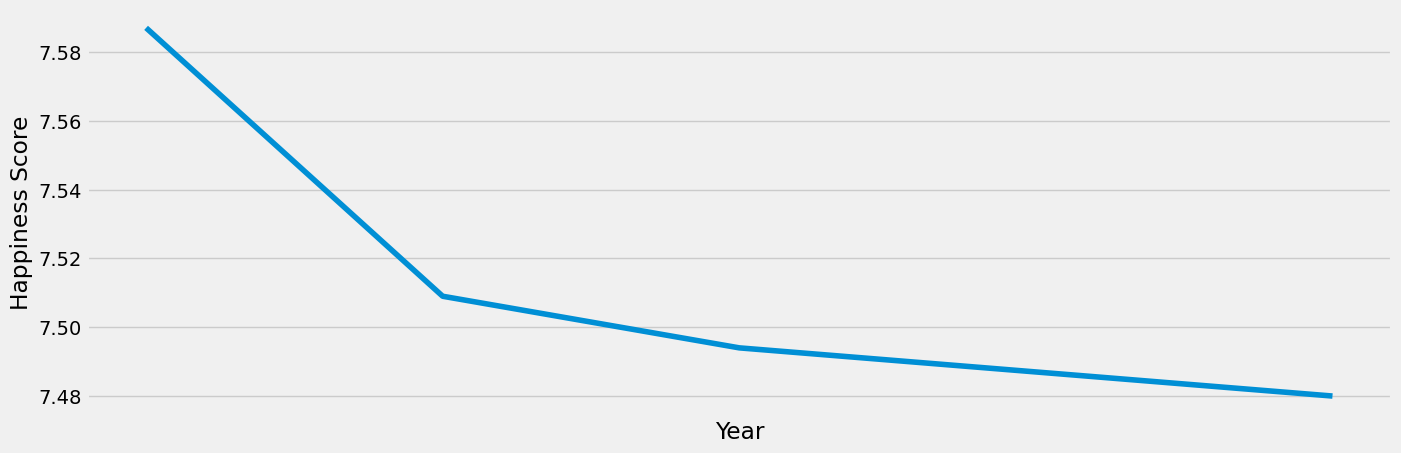

In [100]:
# This was my attempt at using the Happiness Data Set. I could not get the Years to show on the x-axis and decomposition was not possible.

# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_3)
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.

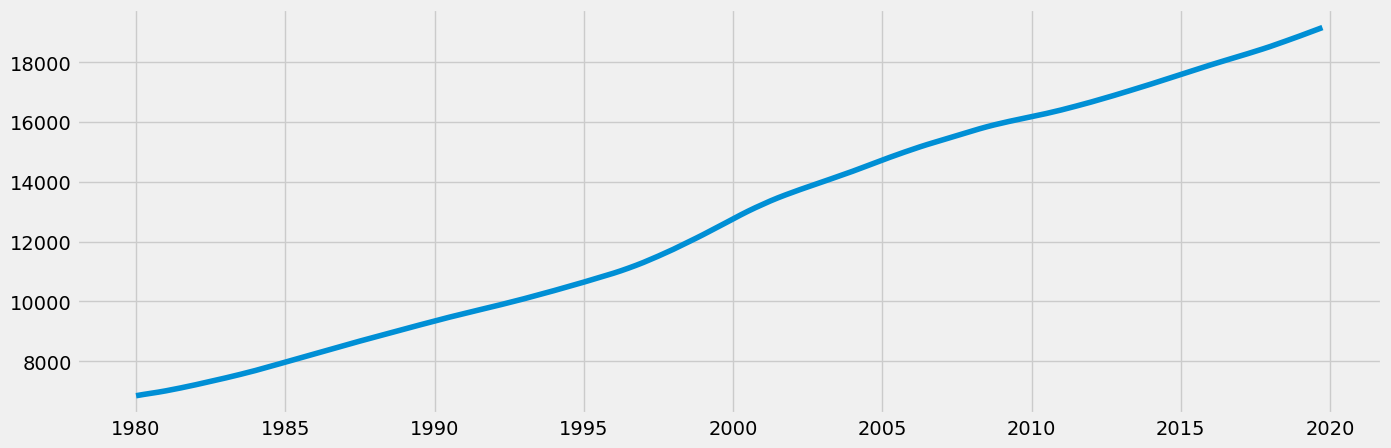

In [111]:
# This is the Quandl data set.

# Plot the new data set

GDP_time_line = plt.figure(figsize=(15,5), dpi=100)
GDP_time_line = plt.plot(data_sub)

### Decompose the data’s components. Analyze the results from the plot in a markdown cell.

In [86]:
# This was my last attempt to make the Happiness Data Set work. From here on the Quandl data set will be used for this task.

# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub_3, model='additive')

ValueError: freq N not understood. Please report if you think this is in error.

In [102]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Value    0
dtype: int64

In [103]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

In [104]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [105]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

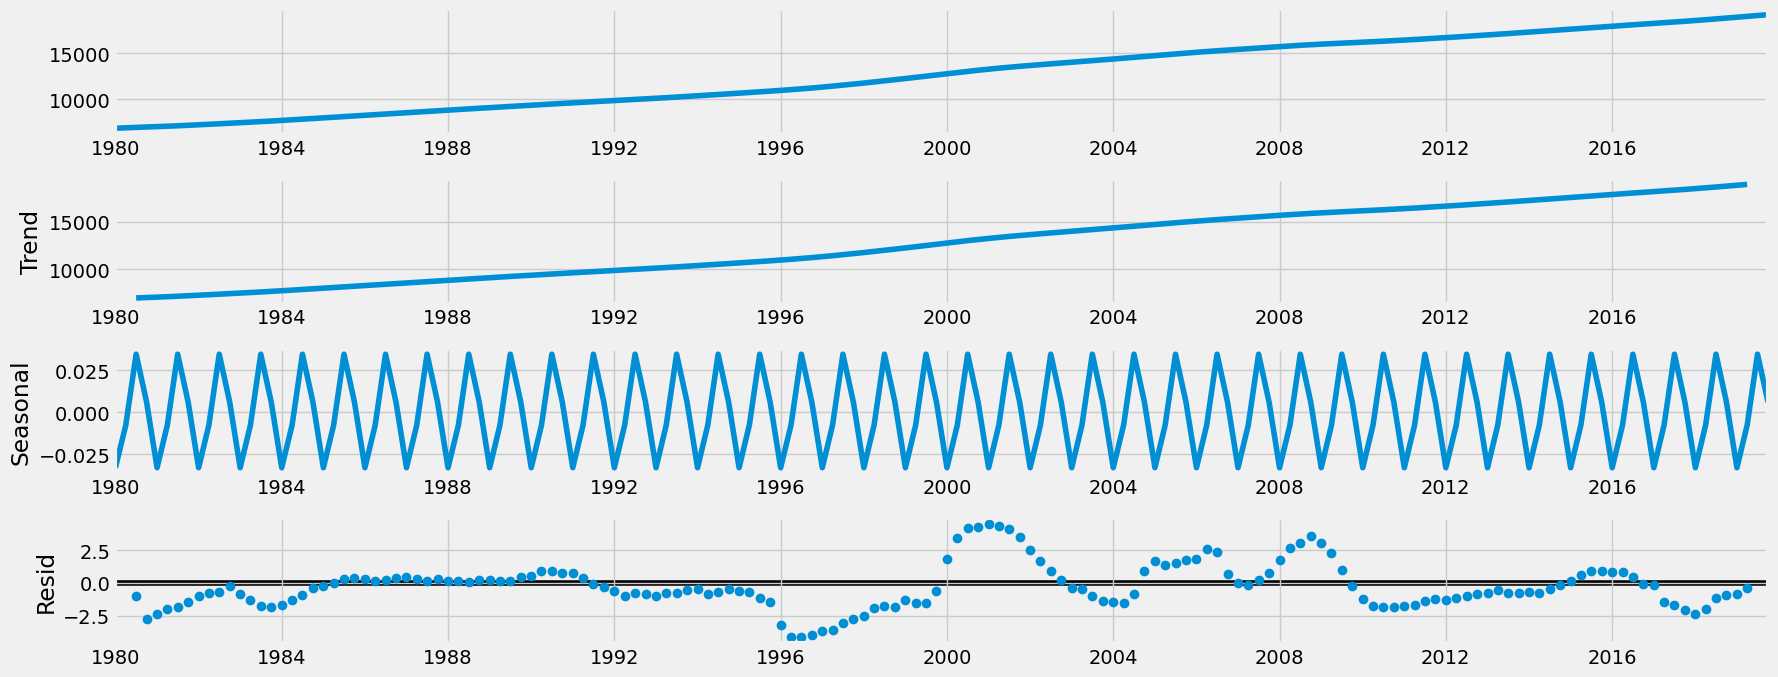

In [107]:
# Plot the separate components

GDP_decomp = decomposition.plot()
plt.show()

In [108]:
#save image to Visualizations folder
GDP_decomp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'GDP_decomposition.png'))

##### The level and trend appear the same because there is not much noise in the data. There appears to be a dominant upward trend. The spikey curve indicates the presence of some seasonality. There are a few deviations in the Residuals plot, but overall there is no much noise present.

### Conduct a Dickey-Fuller test to check for stationarity. Interpret the results in a markdown cell and reference your null hypothesis.

Null hypothesis: There is a unit root (The data is not stationary).
Alternate hypothesis: There is not a unit root (The data is stationary).

In [113]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.311851
p-value                          0.977882
Number of Lags Used              5.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


##### The test statistic is greater than the 5% and 10% critical values and the p-value is >0.05. The null hypothesis was not disproven. The data is non-stationary.

### If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [114]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1

In [115]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [116]:
data_diff.head()

Value
datetime             
1980-04-01  42.664356
1980-07-01  37.915323
1980-10-01  39.949350
1981-01-01  44.094045
1981-04-01  47.180044

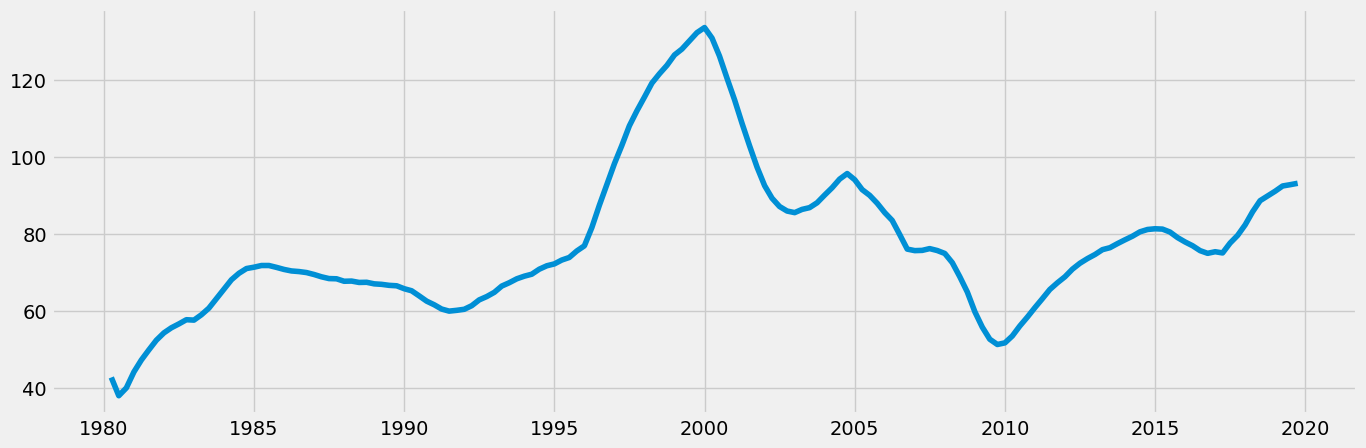

In [117]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [118]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.147756
p-value                          0.225750
Number of Lags Used              4.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


##### The data still is not stationary for the same reasons as stated above.

### If your data still isn’t stationary, perform another round of differencing and repeat step 6.

In [119]:
data_diff_2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1

In [120]:
data_diff_2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

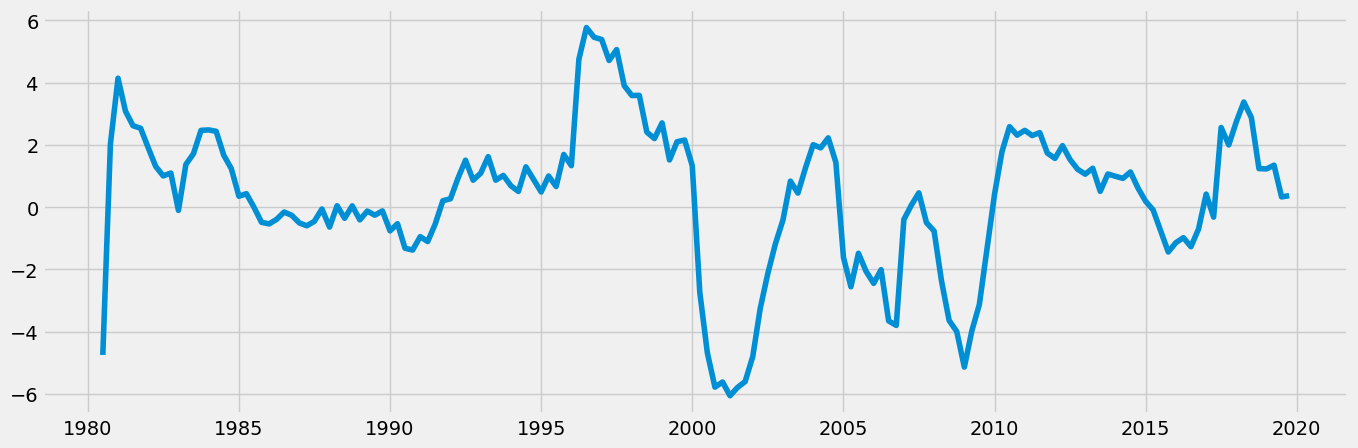

In [121]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [122]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.272410
p-value                          0.000496
Number of Lags Used              3.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


##### The test statistic is now less than both the 5% and 10% critical values and teh p-value is now <0.05. The data should now be considered stationary.

### Check your data’s autocorrelations.

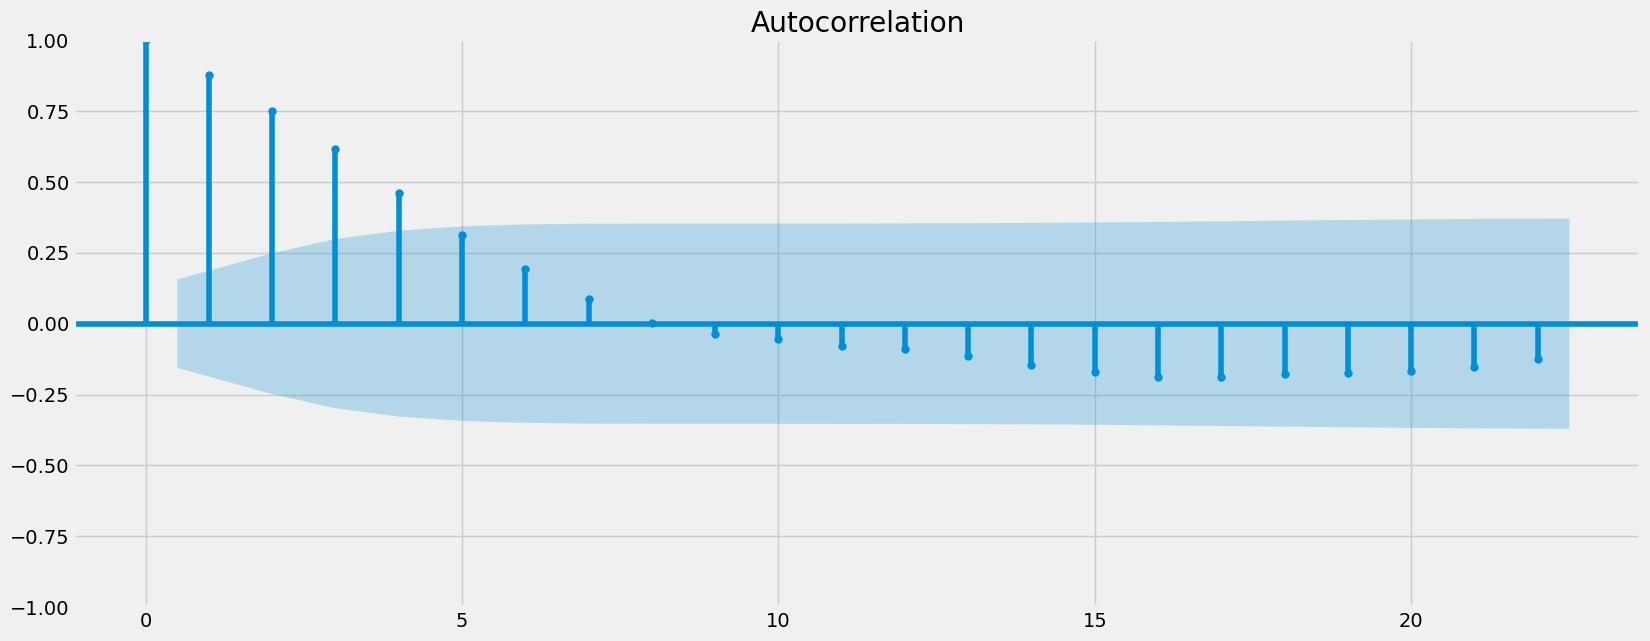

In [124]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff_2)
plt.show()

##### There are <10 bars above the blue area so the data can be considered non-stationary and the null hypothesis can be rejected.